In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
connection=sqlite3.connect('C_team_DB.db')
connection

In [4]:
query="select * from 'sqlite_master'"
pd.read_sql(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [5]:
query="select * from 'order'"
order= pd.read_sql(query,connection)

order

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000
...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900


In [10]:
#당일 매출 상위 10개 쇼핑몰의 id와 총 매출액 구하기 

top_shops=pd.pivot_table(data=order, index='shop_id', values='price', aggfunc='sum').sort_values(by='price', ascending=False).head(10)
top_shops

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


In [19]:
query="""
    select shop_id, sum(price) as price
    from 'order'
    group by shop_id
    order by price desc
"""

sql_top_shops=pd.read_sql(query,connection).head(10)
sql_top_shops.set_index('shop_id')

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
top_shops=pd.pivot_table(data=order, index='shop_id', values='price', aggfunc=['sum','count'])
top_shops


,sum,count
,price,price
shop_id,,
1,84600,3
2,347100,16
3,143100,5
4,49000,1
5,9900,1
...,...,...
191,65000,1
192,7800,2


In [23]:
top_shops.columns

MultiIndex([(  'sum', 'price'),
            ('count', 'price')],
           )

In [25]:
top_shops.columns=['sum','count']
# column명 바꾸기 
top_shops

,sum,count
shop_id,,
1,84600,3
2,347100,16
3,143100,5
4,49000,1
5,9900,1
...,...,...
191,65000,1
192,7800,2
193,39000,5


In [26]:
top_shops_10=top_shops.sort_values(by='sum', ascending=False).head(10)

In [27]:
top_shops_10

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [29]:
query="""
    select shop_id, sum(price) as price, count(price) as count
    from 'order'
    group by shop_id
    order by price desc
"""

sql_top_shops=pd.read_sql(query,connection).head(10)
sql_top_shops
#sql_top_shops.set_index('shop_id')

,shop_id,price,count
0,22,1365200,99
1,14,872000,30
2,63,710700,27
3,32,707900,37
4,126,669400,39
5,6,655900,24
6,11,653000,19
7,60,558300,23
8,19,518400,19
9,12,446900,42


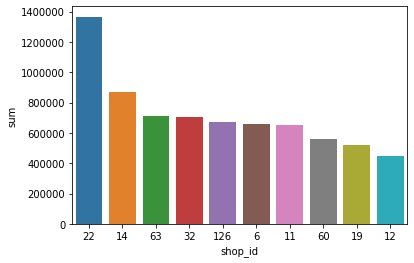

In [34]:
sns.barplot(x=top_shops_10.index,y='sum',data=top_shops_10, order=top_shops_10.index)

#shop_id가 top_shops_id가 index이기 때문에 안되고 index로 넘겨주기

# 높은 순으로 만들고 싶은데 그것이 index순이니까 